In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [3]:

customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data = customer_data.iloc[:, 3:5].values


In [7]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

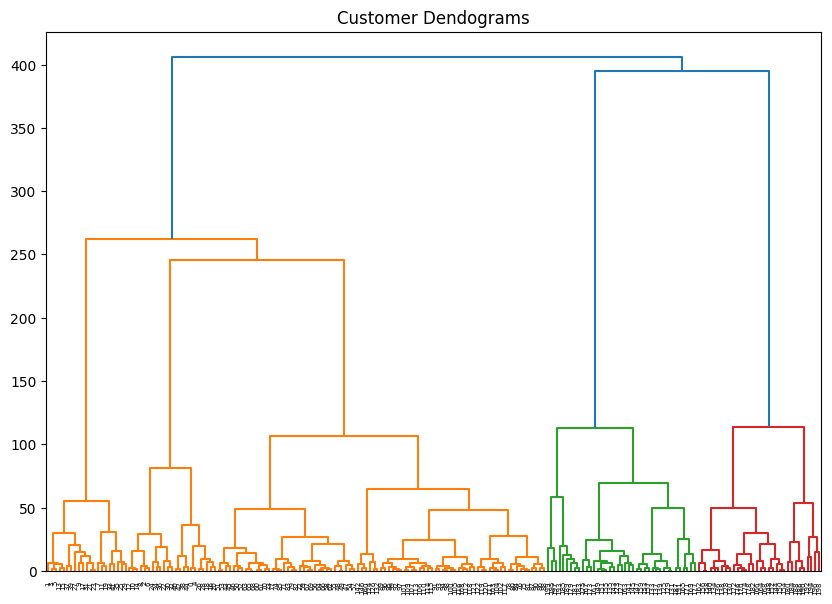

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_=cluster.fit_predict(data)

In [10]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

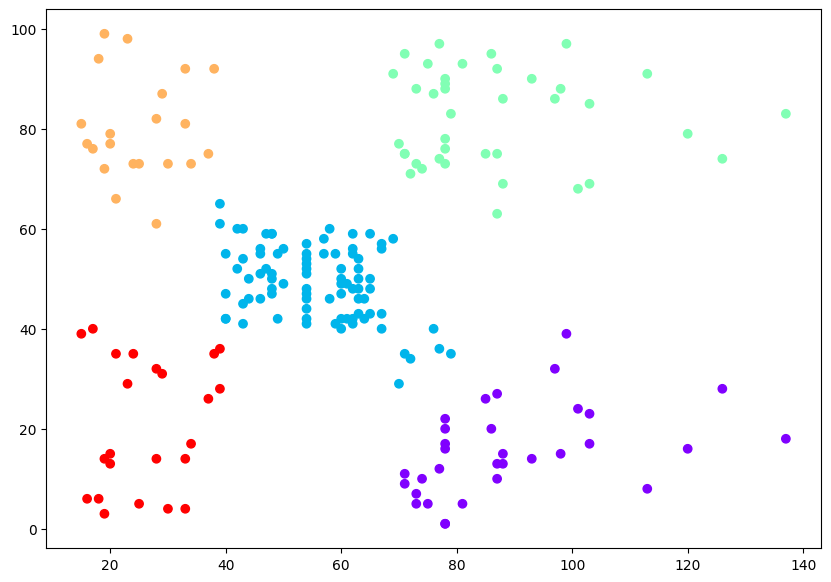

In [11]:

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Wine Dataset

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [13]:
wine = datasets.load_wine()

In [14]:
data = wine.data
targets = wine.target

In [15]:
wine.target_names # the names of targets

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [16]:
data.shape # 178 samples and 13 features

(178, 13)

In [17]:
wine.feature_names # the names of 13 features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [18]:
df = pd.DataFrame(data, columns=wine.feature_names)
df['target_names'] = targets # add targets to the dataframe
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [19]:
df.target_names.value_counts()

target_names
1    71
0    59
2    48
Name: count, dtype: int64

In [20]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [21]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.2)  # adjust threshold as needed
X_var = selector.fit_transform(df)
selected_features = df.columns[selector.get_support()]

print("Low-variance removed:", set(df.columns) - set(selected_features))
print("Selected:", selected_features)

Low-variance removed: {'ash', 'nonflavanoid_phenols', 'hue'}
Selected: Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'proanthocyanins', 'color_intensity',
       'od280/od315_of_diluted_wines', 'proline', 'target_names'],
      dtype='object')


In [22]:
new_df = df[['alcohol', 'alcalinity_of_ash', 'magnesium', 'color_intensity', 'proline']]
new_df.head()

,alcohol,alcalinity_of_ash,magnesium,color_intensity,proline
0,14.23,15.6,127.0,5.64,1065.0
1,13.20,11.2,100.0,4.38,1050.0
2,13.16,18.6,101.0,5.68,1185.0
3,14.37,16.8,113.0,7.80,1480.0
4,13.24,21.0,118.0,4.32,735.0


In [23]:
new_df.shape

(178, 5)

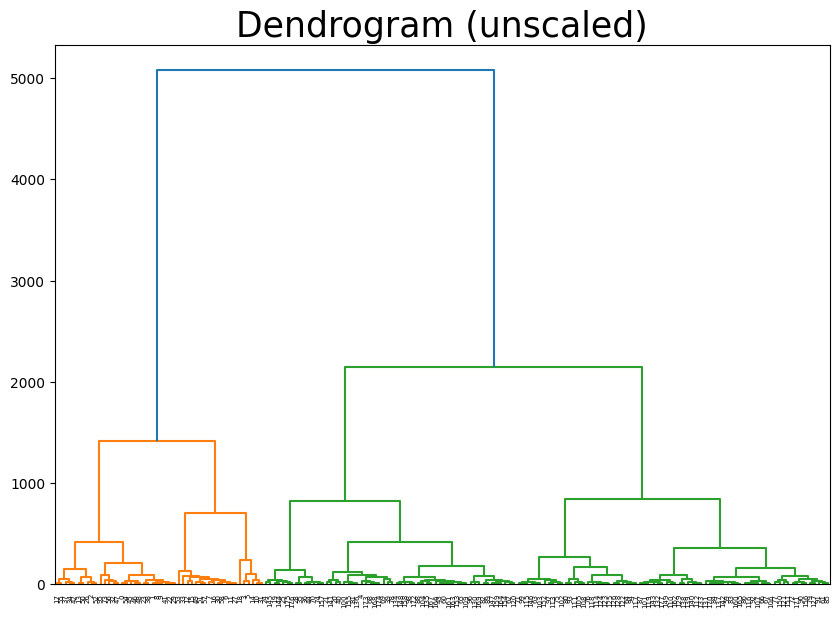

In [24]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram (unscaled)', fontsize=25)
d_unscaled = dendrogram(linkage(new_df, method='ward'))

In [25]:
scaler = StandardScaler()
scaled = scaler.fit_transform(new_df) 

In [26]:
scaled.shape # same shape as 'new_df'

(178, 5)

In [27]:
df_scaled = pd.DataFrame(scaled, columns=new_df.columns)
df_scaled.head()

,alcohol,alcalinity_of_ash,magnesium,color_intensity,proline
0,1.518613,-1.169593,1.913905,0.251717,1.013009
1,0.246290,-2.490847,0.018145,-0.293321,0.965242
2,0.196879,-0.268738,0.088358,0.269020,1.395148
3,1.691550,-0.809251,0.930918,1.186068,2.334574
4,0.295700,0.451946,1.281985,-0.319276,-0.037874


In [28]:
df_scaled.shape

(178, 5)

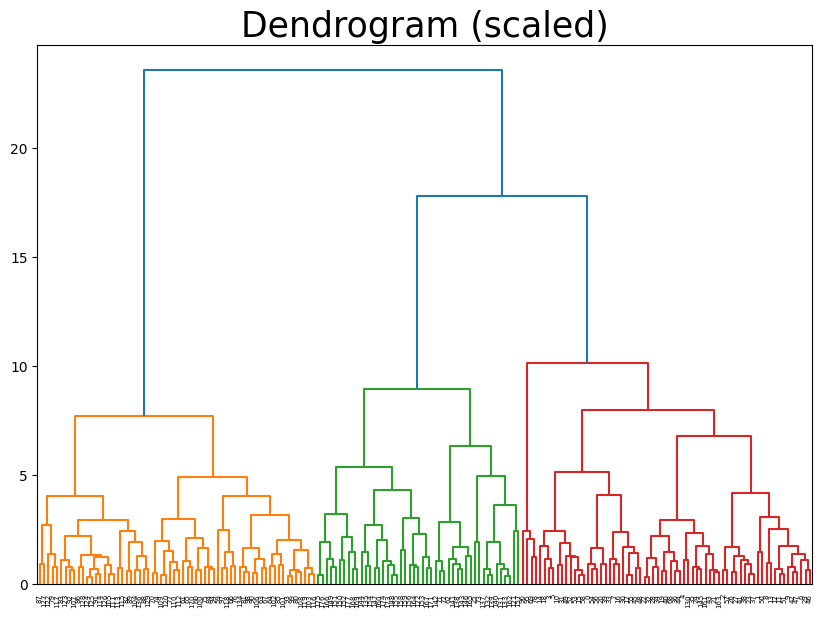

In [29]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram (scaled)', fontsize=25)
d_unscaled = dendrogram(linkage(df_scaled, method='ward'))

In [30]:
agg = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
alcohal_labels=agg.fit_predict(data)

In [31]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data, alcohal_labels)
score

0.5644796401732068

In [32]:
alcohal_labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [33]:
df_scaled['ground_truth'] = targets
df_scaled['prediction'] = alcohal_labels
df_scaled.head()

,alcohol,alcalinity_of_ash,magnesium,color_intensity,proline,ground_truth,prediction
0,1.518613,-1.169593,1.913905,0.251717,1.013009,0,0
1,0.246290,-2.490847,0.018145,-0.293321,0.965242,0,0
2,0.196879,-0.268738,0.088358,0.269020,1.395148,0,0
3,1.691550,-0.809251,0.930918,1.186068,2.334574,0,0
4,0.295700,0.451946,1.281985,-0.319276,-0.037874,0,2


In [34]:
print(df_scaled.ground_truth.unique())
print(df_scaled.prediction.unique())

[0 1 2]
[0 2 1]


In [35]:
cm = metrics.confusion_matrix(targets, alcohal_labels)

Text(0.5, 1.0, 'Confusion Matrix')

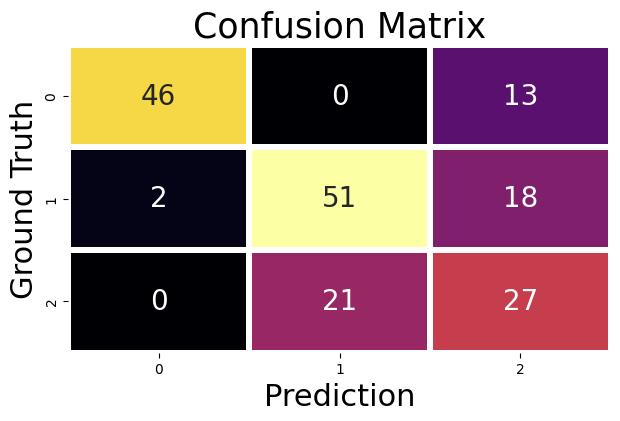

In [36]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', linewidth=4, cbar=False, annot_kws={'size': 20}, cmap='inferno')

plt.xlabel('Prediction', fontsize=22)
plt.ylabel('Ground Truth', fontsize=22)
plt.title('Confusion Matrix', fontsize=25)

